In [1]:
#Future possible stuff
#Click each profile to get follow count
#Find the sentement for all of the comments
#Might need to switch to firefox for headless setup

In [2]:
import pandas as pd
import time
import numpy as np

In [3]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

In [4]:
options = Options()
options.headless = True
driver = webdriver.Firefox(options = options)
driver.get("https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin")

In [5]:
time.sleep(3)
email = driver.find_element_by_id('username')
email.click()
email.send_keys('nachoeddie@gmail.com')
password = driver.find_element_by_id('password')
password.click()
password.send_keys('GotHeOnfOrsi')
driver.find_element_by_xpath("//button[@type = 'submit']").click()

In [6]:
time.sleep(6)
search_bar = driver.find_element_by_class_name('search-global-typeahead__input')

In [7]:
search_bar.click()
search_bar.send_keys('Hospital & Health Care')
search_bar.send_keys(u'\ue007')


In [8]:
time.sleep(7)
driver.find_element_by_xpath("//button[@aria-label='View only Content results']").click()

In [9]:
# def scroll_scrape(num_posts, scroll_time = 2):
#     if num_posts % 6 != 0:
#         raise ValueError('Number of posts wanted to scrape is not divisible by 6.')
#     last_height = driver.execute_script("return document.body.scrollHeight")
#     num_scrapped = 0
#     scroll_num = 0 
#     while num_scrapped < num_posts:
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         time.sleep(scroll_time)
#         new_height=driver.execute_script("return document.body.scrollHeight")
#         if new_height == last_height:
#             posts = driver.find_elements_by_xpath("//li[@class='search-content__result search-entity ember-view']")
#             break
#         last_height = new_height
#         scroll_num += 1
#         if scroll_num >= num_posts / 6:
#             posts = driver.find_elements_by_xpath("//li[@class='search-content__result search-entity ember-view']")
#             num_scrapped = len(posts)
#     return posts

In [10]:
from numpy.random import randint
def scroll_scrape(num_posts, scroll_time = 1):
    if num_posts % 6 != 0:
        raise ValueError('Number of posts wanted to scrape is not divisible by 6.')
    last_height = driver.execute_script("return document.body.scrollHeight")
    num_scrapped = 0
    scroll_num = 0 
    non_loads = 0
    dist = 50
    while num_scrapped < num_posts:
#         scroll_time = randint(2, 6)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(scroll_time)
        new_height=driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight - {dist})")
            dist += 50
            non_loads += 1
            if non_loads > 15:
                posts = driver.find_elements_by_xpath("//li[@class='search-content__result search-entity ember-view']")
                break
        else:
            last_height = new_height
            non_loads = 0
            scroll_num += 1
            dist = 50
            if scroll_num >= num_posts / 6:
                posts = driver.find_elements_by_xpath("//li[@class='search-content__result search-entity ember-view']")
                num_scrapped = len(posts)
    return posts


In [11]:
result = scroll_scrape(num_posts = 3000)
len(result)


614

In [12]:
import re
def only_numeric(str):
    return float(re.sub("[^0-9]", "", str))


In [13]:
def see_more(post):
    try:
        see_more = post.find_element_by_xpath(".//button[@class='feed-shared-inline-show-more-text__see-more-less-toggle see-more t-14 t-black--light t-normal hoverable-link-text']")
    except:
        pass
    else:
        see_more.click()

In [14]:
def name_scrape(post):
    try:
        name = post.find_element_by_xpath(".//span[@class='feed-shared-actor__name t-14 t-black t-bold hoverable-link-text']")
    except:
        pass
    else:
        return name.text.replace('\n', '')

In [15]:
def subdes_scrape(post):
    try:
        subdes = post.find_element_by_xpath(".//div[@class='truncate feed-shared-text-view white-space-pre-wrap break-words ember-view']")
    except:
        pass
    else:
        return subdes.text.replace('\n', '')

In [25]:
def time_scrape(post):
    try:
        scrapped = post.find_elements_by_xpath(".//div[@class = 'feed-shared-text-view white-space-pre-wrap break-words ember-view']")
        time = scrapped[-1].text
    except:
        pass
    else:
        for idx, char in enumerate(time):
            if char.isalnum() == False:
                return time[:idx]

In [17]:
def corpus_scrape(post):
    try:
        corpus = post.find_element_by_xpath(".//div[@class='feed-shared-update-v2__description-wrapper ember-view']")
    except:
        pass
    else:
        return corpus.text.replace('\n', ' ')

In [18]:
def reaction_scrape(post):
    try:
        reaction = post.find_element_by_xpath(".//span[@class='v-align-middle social-details-social-counts__reactions-count']")
    except:
        return 0.0
    else:
        return only_numeric(reaction.text)

In [19]:
def comment_scrape(post):
    try:
        comments = post.find_element_by_xpath(".//li[@class='social-details-social-counts__item social-details-social-counts__comments']")
    except:
        return 0.0
    else:
        return only_numeric(comments.text)

In [20]:
def art_scrape(post):
    try:
        art_title = post.find_element_by_xpath(".//h2[@class='feed-shared-article__title t-14 t-bold t-black']")
        art_source = post.find_element_by_xpath(".//h3[@class='feed-shared-article__subtitle t-12 t-normal t-black--light']")
    except:
        pass
    else:
        return (art_title.text.replace('\n', ''), art_source.text.replace('\n', ''))

In [21]:
def img_scrape(post):
    try:
        imgs = post.find_elements_by_xpath(".//div[@class='feed-shared-image__container']")
    except:
        pass
    else:
        return len(imgs)

In [22]:
def video_scrape(post):
    try:
        post.find_element_by_xpath(".//div[@class='feed-shared-linkedin-video__container ']")
        views = post.find_element_by_xpath(".//li[@class='social-details-social-counts__item']")
    except:
        pass
    else:
        return (1, only_numeric(views.text))

In [23]:
def array_post(post):
    see_more(post)
    a = [None] * 11
    arr = np.asarray(a)
    name = name_scrape(post)
    subdes = subdes_scrape(post)
    time = time_scrape(post)
    corp = corpus_scrape(post)
    react = reaction_scrape(post)
    com = comment_scrape(post)
    art = art_scrape(post)
    img = img_scrape(post)
    vid = video_scrape(post)
    if name != None:
        arr[0] = name
    if subdes != None:
        arr[1] = subdes
    arr[2] = time
    if corp != None:
        arr[3] = corp
    arr[4] = react
    arr[5] = com
    if art != None:
        arr[6] = art[0]
        arr[7] = art[1]
    if img != None:
        arr[8] = img
    if vid != None:
        arr[9] = vid[0]
        arr[10] = vid[1]
    return arr

In [26]:
time.sleep(7)
mat = np.array([])
post_num = 1
for post in result:
    print(post_num)
    arr = array_post(post)
    mat = np.append(mat, arr)
    post_num += 1
rmat = mat.reshape(-1,11)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [27]:
cols = np.array(['name', 'subdes', 'time_dis', 'corpus', 'reaction', 'comments', 'art_title', 'art_source', 'img', 'video', 'views'])
df = pd.DataFrame(rmat, columns = cols)

In [28]:
import langdetect
#ISO 639-1 codes
def langfind(x):
    try:
        return str(langdetect.detect_langs(x)[0])[:2]
    except:
        return np.nan
df['language'] = df['corpus'][df['corpus'].apply(lambda x: x != None)].apply(langfind)

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
corpus_sent = df['corpus'][df['corpus'].apply(lambda x: x != None)].apply(lambda x: analyser.polarity_scores(x))
# corpus_sent = df.corpus.apply(analyser.polarity_scores)
df['neg'] = corpus_sent.apply(lambda x: x['neg'])
df['neu'] = corpus_sent.apply(lambda x: x['neu'])
df['pos'] = corpus_sent.apply(lambda x: x['pos'])
df['compound'] = corpus_sent.apply(lambda x: x['compound'])

In [30]:
df.head()

,name,subdes,time_dis,corpus,reaction,comments,art_title,art_source,img,video,views,language,neg,neu,pos,compound
0,Samina Badar,Deputy Manager Pharmacy Shaukat Khanum Cancer ...,1d,Alhamdollilah achieved 1st position in MBA Hos...,4688,565,None,None,1,None,None,en,0.000,0.758,0.242,0.4939
1,Svetlana Lipyanskaya,"Sr. Assistant Vice President, Acute and Ambula...",12h,I’m so thrilled to join the excellent team at ...,100,24,Svetlana Lipyanskaya Appointed New CEO of NYC ...,nychealthandhospitals.org,0,None,None,en,0.000,0.727,0.273,0.9408
2,Brian Golod,Discover Your Resume Majesty | Be an Interview...,3d,This is the worst thing about living in Canada...,509,111,None,None,1,None,None,en,0.029,0.738,0.233,0.9954
3,Kenneth Barrette,"Managing Director at Alvarez & Marsal, Healthc...",3d,hashtag #happyholidays 2019! What a year wor...,81,9,None,None,1,None,None,en,0.000,0.646,0.354,0.9894
4,Marco Iannuzzi,CEO Nuzzi Ventures--currently building a desti...,1w,"Many of us push + push, & work + work to our b...",839,200,None,None,1,None,None,en,0.087,0.809,0.104,0.7391


In [31]:
# df.to_csv("banking.csv", index=False)

In [32]:
df['reaction'].value_counts()

0.0       296
1.0        37
2.0        33
3.0        15
6.0        15
         ... 
99.0        1
103.0       1
105.0       1
1130.0      1
64.0        1
Name: reaction, Length: 103, dtype: int64

In [33]:
df.tail()

,name,subdes,time_dis,corpus,reaction,comments,art_title,art_source,img,video,views,language,neg,neu,pos,compound
609,Proloy Bagchi,Independent Writing,None,None,0,0,Memories of an ordinary Indian:: 30 :: Chandigarh,Proloy Bagchi on LinkedIn,0,None,None,NaN,NaN,NaN,NaN,NaN
610,Moe Khan,Helping Type2 Diabetes people to lower blood s...,None,None,0,0,Is it Wrong to think of FOOD AS MEDICINE?,Moe Khan on LinkedIn,0,None,None,NaN,NaN,NaN,NaN,NaN
611,Rosland Sears,--,None,None,0,0,Appeal All Insurance Coverages and Provisions ...,Rosland Sears on LinkedIn,0,None,None,NaN,NaN,NaN,NaN,NaN
612,Rosland Sears,--,None,None,0,0,Appeal All Insurance Coverages and Provisions ...,Rosland Sears on LinkedIn,0,None,None,NaN,NaN,NaN,NaN,NaN
613,Jeannine Peek,Vice President & Regional General Manager at D...,None,None,0,0,How technology is changing the healthcare sector,Jeannine Peek on LinkedIn,0,None,None,NaN,NaN,NaN,NaN,NaN


In [34]:
df.language.value_counts(sort = False).plot.pie()

In [35]:
n_cor = df['reaction'][df['corpus'].apply(lambda x: x == None)].mean()
cor = df['reaction'][df['corpus'].apply(lambda x: x != None)].mean()

In [36]:
plt.bar(['No Text','Text'],[n_cor, cor])

NameError: name 'plt' is not defined

In [37]:
df.groupby([['corpus'].apply(lambda x: x == None)]).mean()

AttributeError: 'list' object has no attribute 'apply'

In [38]:
plt.scatter(df['pos'][df['corpus'].apply(lambda x: x != None)], df['reaction'][df['corpus'].apply(lambda x: x != None)])

NameError: name 'plt' is not defined

In [39]:
df[['art_source', 'comments']].groupby('art_source').mean()

DataError: No numeric types to aggregate

In [40]:
df[df['neu'].apply(lambda x: type(x) != float)]

,name,subdes,time_dis,corpus,reaction,comments,art_title,art_source,img,video,views,language,neg,neu,pos,compound


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [42]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['corpus'][df['language'] == 'en'])

In [43]:
X[0]

<1x5608 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

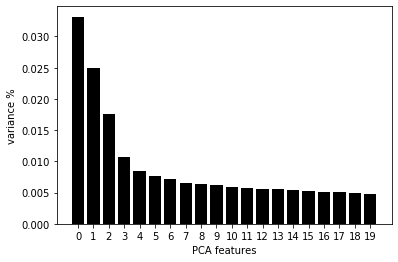

In [44]:
from sklearn.preprocessing import StandardScaler
# Standardize the data to have a mean of ~0 and a variance of 1
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X.todense())# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

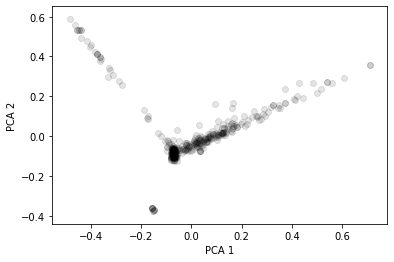

In [45]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [46]:
num_clusters = 4
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# create k-means model with custom config
clustering_model = KMeans(n_clusters=num_clusters)

labels = clustering_model.fit_predict(X)

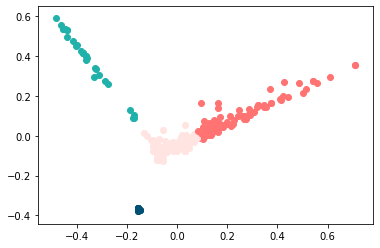

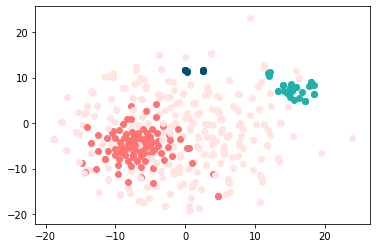

In [47]:
dense = X.todense()
reduced_data = PCA(n_components=pca_num_components).fit_transform(dense)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(dense)
fig, ax = plt.subplots()
for index, instance in enumerate(Y):
    tsne_1, tsne_2 = Y[index]
    color = labels_color_map[labels[index]]
    ax.scatter(tsne_1, tsne_2, c=color)
# plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [48]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

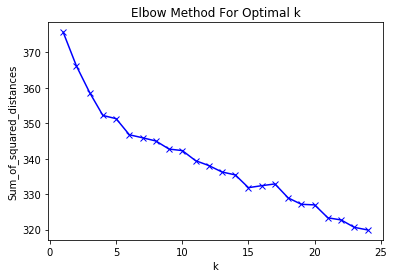

In [49]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
print("Top terms per cluster:")
order_centroids = clustering_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in K:
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 1:
 hashtag
 healthcare
 care
 health
 hospital
 medicine
 patient
 hospitals
 technology
 https
Cluster 2:
 care
 health
 hashtag
 hospital
 hospitals
 work
 patients
 great
 new
 healthcare
Cluster 3:
 req
 wolf
 matt
 rsm
 acquisition
 appeal
 tells
 subscription
 commercial
 senior
Cluster 4:


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
#This is how to predict what cluster a corpus would be in.
Y = vectorizer.transform(["Nicotine is very bad for your health just like vaping."])
prediction = model.predict(Y)
print(prediction)

In [ ]:
print(model.cluster_centers_)

In [ ]:
top_centroids = model.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(terms[i] for i in centroid)))